<div align="center">
  <h1>EN2550: Assignment 03 on Object Counting on a Conveyor Belt</h1>
  <h2>Name : Tharindu O.K.D<br>
    Index No. : 190622R </h2>
</div>

## Connected Component Analysis

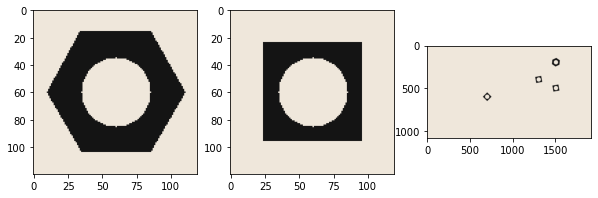

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(10, 10))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2RGB))
plt.show()

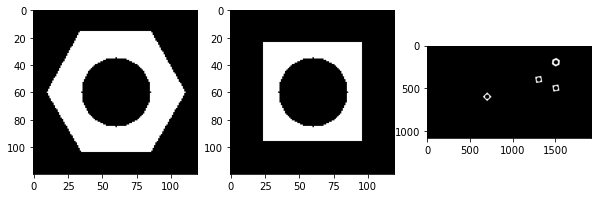

In [3]:
hexnut_ret, hexnut_thresh = cv.threshold(cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
squarenut_ret, squarenut_thresh = cv.threshold(cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
conveyor_f100_ret, conveyor_f100_thresh = cv.threshold(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(hexnut_thresh, cmap='gray')
ax[1].imshow(squarenut_thresh, cmap='gray')
ax[2].imshow(conveyor_f100_thresh, cmap='gray')
plt.show()

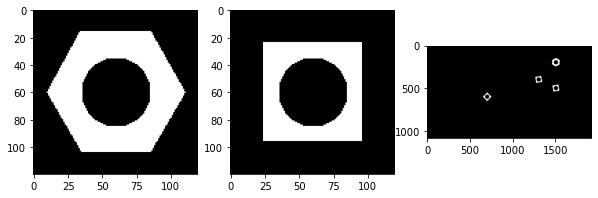

In [5]:
kernel = np.ones((3, 3), np.uint8)
hexnut_closed = cv.morphologyEx(hexnut_thresh, cv.MORPH_CLOSE, kernel)
squarenut_closed = cv.morphologyEx(squarenut_thresh, cv.MORPH_CLOSE, kernel)
conveyor_f100_closed = cv.morphologyEx(conveyor_f100_thresh, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(hexnut_closed, cmap='gray')
ax[1].imshow(squarenut_closed, cmap='gray')
ax[2].imshow(conveyor_f100_closed, cmap='gray')
plt.show()

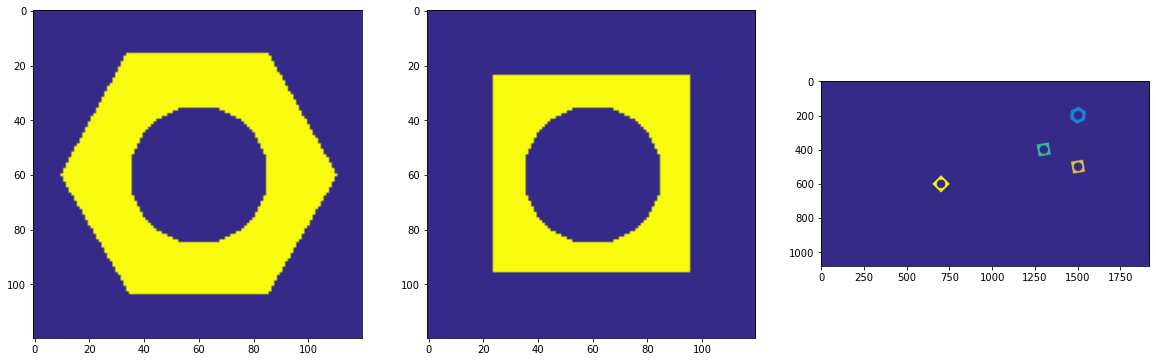

----------------------------------------------------------------------------------------------------
        Hexnut Objects                  Area                                  Centroid
            Background                   120                 [59.33684864 59.63513234]
              Object 1                    88                 [59.83375635 59.22356176]
----------------------------------------------------------------------------------------------------
     Squarenut Objects                  Area                                  Centroid
            Background                   120                   [59.5875772 59.5875772]
              Object 1                    72                 [59.19677719 59.19677719]
----------------------------------------------------------------------------------------------------
 Conveyor_f100 Objects                  Area                                  Centroid
            Background                  1080               [957.36323524 540.44416273]
 

In [81]:
hexnut_retval, hexnut_labels, hexnut_stats, hexnut_centroids = cv.connectedComponentsWithStats(hexnut_closed)
squarenut_retval, squarenut_labels, squarenut_stats, squarenut_centroids = cv.connectedComponentsWithStats(squarenut_closed)
conveyor_f100_retval, conveyor_f100_labels, conveyor_f100_stats, conveyor_f100_centroids = cv.connectedComponentsWithStats(conveyor_f100_closed)

hexnut_colormap = cv.applyColorMap((hexnut_labels/np.amax(hexnut_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)
squarenut_colormap = cv.applyColorMap((squarenut_labels/np.amax(squarenut_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)
conveyor_f100_colormap = cv.applyColorMap((conveyor_f100_labels/np.amax(conveyor_f100_labels)*255).astype('uint8'), cv.COLORMAP_PARULA)

fig, ax = plt. subplots(1,3,figsize=(20, 10))
ax[0].imshow(cv.cvtColor(hexnut_colormap, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(squarenut_colormap, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(conveyor_f100_colormap, cv.COLOR_BGR2RGB))
plt.show()

print('-'*100)
print("{:>22}{:>22}{:>42}".format("Hexnut Objects", "Area", "Centroid"))
for i in range(hexnut_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), hexnut_stats[i][3], str(hexnut_centroids[i])))
print('-'*100)
print("{:>22}{:>22}{:>42}".format("Squarenut Objects", "Area", "Centroid"))
for i in range(squarenut_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), squarenut_stats[i][3], str(squarenut_centroids[i])))
print('-'*100)
print("{:>22}{:>22}{:>42}".format("Conveyor_f100 Objects", "Area", "Centroid"))
for i in range(conveyor_f100_retval):
    print("{:>22}{:>22}{:>42}".format("Background" if i == 0 else "Object " + str(i), conveyor_f100_stats[i][3], str(conveyor_f100_centroids[i])))
print('-'*100)

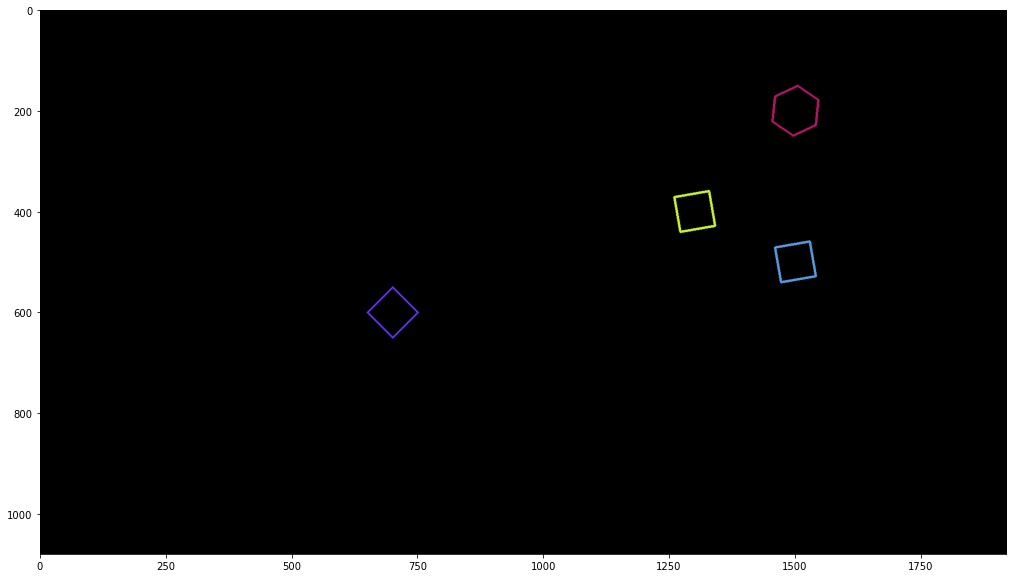

In [90]:
import random as rng
_, hexnut_contours, hexnut_template_hierarchy= cv.findContours(hexnut_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnut_contour = hexnut_contours[0]

_, squarenut_template_contours, squarenut_template_hierarchy= cv.findContours(squarenut_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
squarenut_contour = squarenut_template_contours[0]

_, conveyor_f100_contours, conveyor_f100_contours_hierarchy= cv.findContours(conveyor_f100_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
img = np.zeros(conveyor_f100.shape, dtype=np.uint8)
for i in range(len(conveyor_f100_contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(img, conveyor_f100_contours, i, color, 3, cv.LINE_8, conveyor_f100_contours_hierarchy, 0)

fig, ax = plt. subplots(figsize=(20, 10))
ax.imshow(img)
plt.show()

In [84]:
count = 0
for cnt in conveyor_f100_contours:
    ret = cv.matchShapes(cnt,hexnut_contour,1,0.0)
    if (ret < 0.001): 
        count += 1
        
print(count)

5000.0
4905.0
4905.0
6456.0
1


In [82]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [121]:
# Yor code here.
frame_array = []
shape = (1080, 1920, 3)
cap = cv.VideoCapture('conveyor.mp4')

maximum_y = {'hexnut':0, 'squarenut':0}
total = {'hexnut':0, 'squarenut':0, 'total':0}
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    conveyor_ret, conveyor_thresh = cv.threshold(cv.cvtColor(frame, cv.COLOR_BGR2GRAY), 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    conveyor_closed = cv.morphologyEx(conveyor_thresh, cv.MORPH_CLOSE, kernel)
    _, conveyor_contours, conveyor_contours_hierarchy= cv.findContours(conveyor_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    contour_y = {'hexnut':[], 'squarenut':[]}
    count = {'hexnut':0, 'squarenut':0}
    for cnt in conveyor_contours:
        ret = cv.matchShapes(cnt, hexnut_contour, 1, 0.0)
        if (ret < 0.001):
            M = cv.moments(cnt)
            if (M['m00']>5000):
                count['hexnut'] += 1
                contour_y['hexnut'].append(int(M['m10']/M['m00']))

        ret = cv.matchShapes(cnt, squarenut_contour, 1, 0.0)
        if (ret < 0.001):
            M = cv.moments(cnt)
            if (M['m00']>3000):
                count['squarenut'] += 1
                contour_y['squarenut'].append(int(M['m10']/M['m00']))
    
    frame_maximum = {'hexnut':0, 'squarenut':0}
    for nut in ['hexnut','squarenut']:
        for y in contour_y[nut]:
            frame_maximum[nut] = max(frame_maximum[nut], y)
            if maximum_y[nut] < y:
                total[nut] += 1
        maximum_y[nut] = frame_maximum[nut]

    text = 'Hexnut count in frame       = ' + str(count['hexnut']) +    "      Total hexnut nuts        = " + str(total['hexnut'])
    cv.putText(frame, text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv.LINE_AA)
    text = 'Squarenut count in frame    = ' + str(count['squarenut']) + "       Total squarenut nuts    = " + str(total['squarenut'])
    cv.putText(frame, text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1, cv.LINE_AA)
    text = 'Total nuts = ' + str(total['hexnut'] + total['squarenut'])
    cv.putText(frame, text , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv.LINE_AA)
    frame_array.append(frame)

cap.release()





out = cv.VideoWriter('./conveyor_result_190622R.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
